In [1]:
fig_dir = "../../figures"
fig_ext = "pdf"

In [2]:
import astropy.units as u
import numpy as np

import grasshopper.interferometers as ifo
import grasshopper.sources as sources

import matplotlib.pyplot as plt
#plt.style.use("/home/daniel/thesis/thesis-style.mpl")

import thesis

/home/daniel/.virtualenvs/IGRlaptop21/thesis/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u"'URW Bookman L'"] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


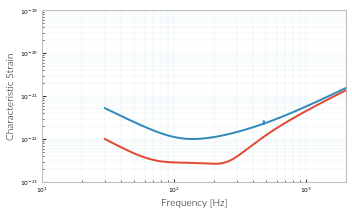

In [3]:
aligo = ifo.AdvancedLIGO()
aligo_o1 = ifo.AdvancedLIGO(configuration="O1")
figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1, figsize=figsize)
aligo.plot(ax)
aligo_o1.plot(ax)
ax.set_xlim([1e1, 2e3]);
ax.set_ylim([1e-23, 1e-19]);
fig.tight_layout()

thesis.thesisify(fig);
fig.savefig("{}/intro/aligo-asd.{}".format(fig_dir, fig_ext), dpi=300)

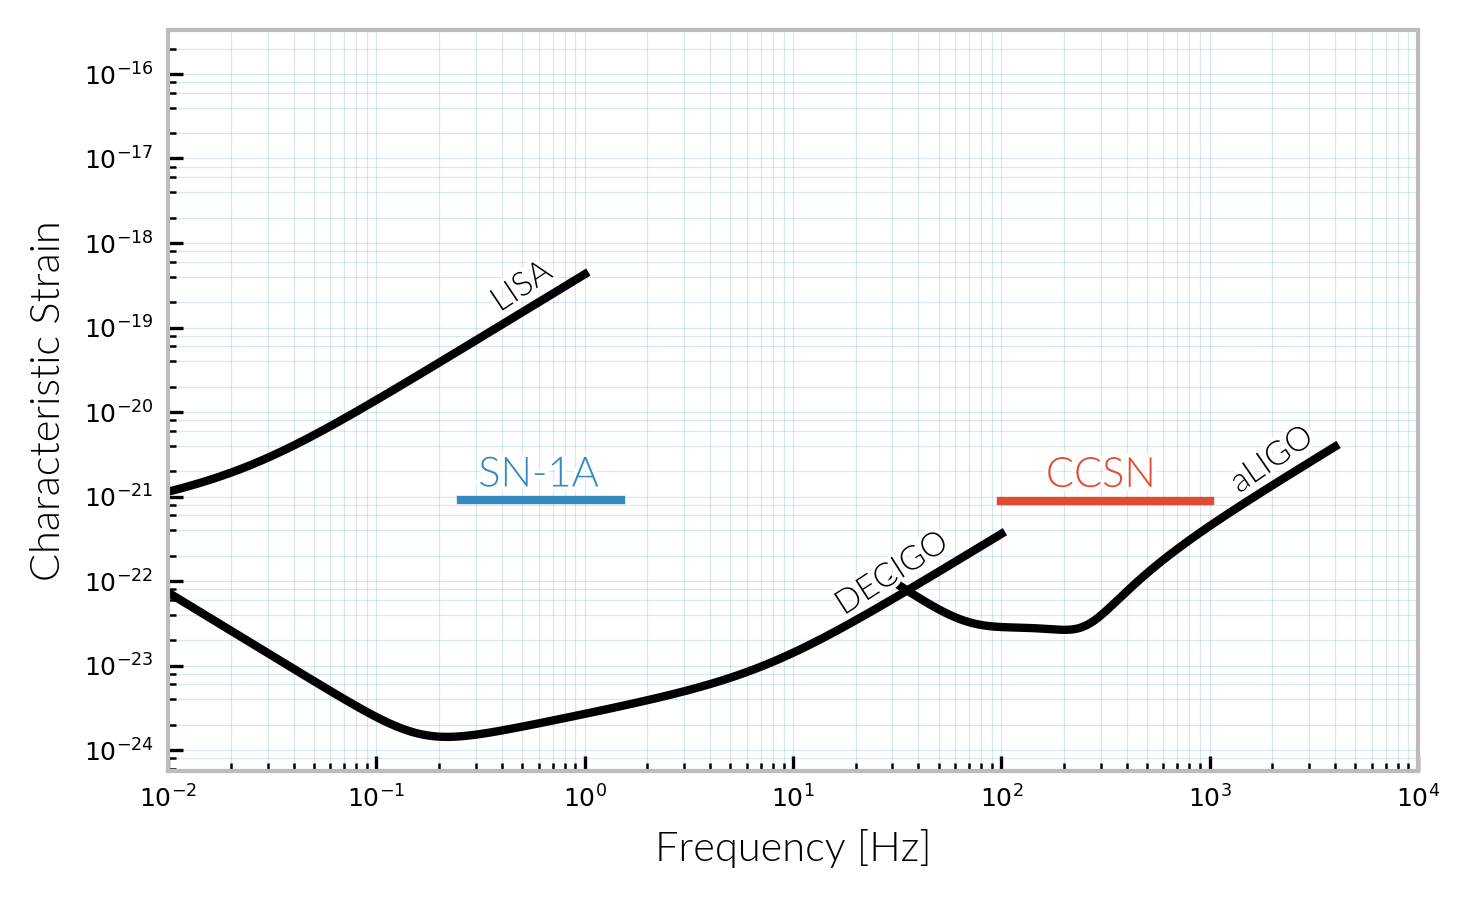

In [4]:
# aligo = ifo.AdvancedLIGO()
lisa = ifo.LISA()
decigo = ifo.Decigo()

figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1, dpi=300)

ax.set_xlim([1e-2, 1e4]);
aligo_line = aligo.plot(ax, color="k")[0]
lisa_line = lisa.plot(ax, color='k')[0]
decigo_line = decigo.plot(ax, color='k')[0]

thesis.labelLine(decigo_line, x=30, label="DECIGO", fontsize=8)
thesis.labelLine(aligo_line, x=2000, label="aLIGO", fontsize=8)
thesis.labelLine(lisa_line, x=0.5, label="LISA", fontsize=8)

#thesis.labelLines(fig.gca().get_lines(), fontsize=8)

ccsn = sources.CoreCollapseSupernova(r=10*u.kiloparsec)
t1as = sources.Type1ASupernova(r=10*u.kiloparsec)
core_line = ccsn.plot(ax)[0]
t1as_line = t1as.plot(ax)[0]

thesis.labelLine(core_line, x=300, label="CCSN")

thesis.labelLine(t1as_line, x=0.6, label="SN-1A")



#ax.set_ylim([1e-23, 1e-19]);
#fig.tight_layout()
#fig.legend(loc="upper right")

ax.get_legend().remove()

fig = thesis.thesisify(fig);
fig.savefig("{}/sources/source-ccsn.{}".format(fig_dir, fig_ext), dpi=300)

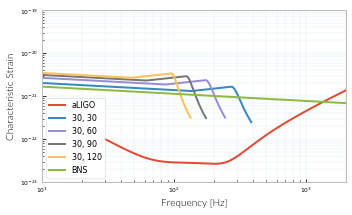

In [6]:
aligo = ifo.AdvancedLIGO()


figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1)
aligo.plot(ax)

mass = 30
for mass2 in [30, 60, 90, 120]:
    cbc = sources.IMR(frequencies=np.logspace(-4, 5, 1000) * u.hertz,
                    m1=mass*u.solMass, m2=mass2*u.solMass, r=0.8*1e9*u.parsec)
    cbc.plot(ax, label="{}, {}".format(mass, mass2))
    
cbc = sources.IMR(frequencies=np.logspace(-4, 5, 1000) * u.hertz,
                m1=1.5*u.solMass, m2=1.5*u.solMass, r=0.8*1e8*u.parsec)
cbc.plot(ax, label="BNS".format(mass, mass2))

ax.set_xlim([1e1, 2e3]);
ax.set_ylim([1e-23, 1e-19]);
#fig.tight_layout()
#fig.legend(loc="upper right")
fig = thesis.thesisify(fig);
#thesis.labelLines(fig.gca().get_lines(), fontsize=8)
fig.savefig("{}/sources/aligo-cbc.{}".format(fig_dir, fig_ext), dpi=300)

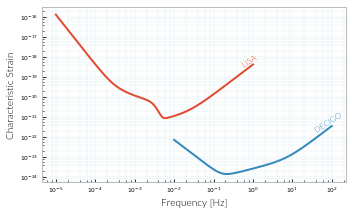

In [5]:
lisa = ifo.LISA()
decigo = ifo.Decigo()
decigo.name = "DECIGO"
figsize = (5.0, 2.5) # Fix this to use the Golden ratio please

fig, ax = plt.subplots(1,1, figsize=figsize)
lisa.plot(ax)
decigo.plot(ax)
#ax.set_xlim([1e-1, 2e3]);
#ax.set_ylim([1e-23, 1e-19]);

thesis.labelLines(fig.gca().get_lines(), fontsize=8)
thesis.thesisify(fig)
fig.savefig("{}/intro/space-asd.{}".format(fig_dir, fig_ext), dpi=300)


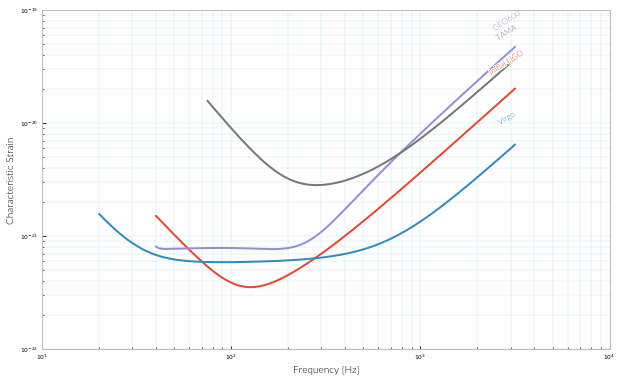

In [23]:
iligo = ifo.InitialLIGO(frequencies=np.logspace(1,3.5,1000)*u.hertz)
virgo = ifo.Virgo(frequencies=np.logspace(1,3.5,1000)*u.hertz)
geo = ifo.GEO(frequencies=np.logspace(1,3.5,1000)*u.hertz)
tama = ifo.TAMA(frequencies=np.logspace(1,3.5,1000)*u.hertz)

fig, ax = plt.subplots(1,1, figsize=figsize)
iligo.plot(ax)
virgo.plot(ax)
geo.plot(ax)
tama.plot(ax)

ax.set_xlim([1e1, 1e4]);
ax.set_ylim([1e-22, 1e-19]);
fig.tight_layout()
thesis.labelLines(fig.gca().get_lines(), fontsize=8)
fig = thesis.thesisify(fig);

fig.savefig("{}/first-gen-asd.{}".format(fig_dir, fig_ext))